In [1]:
# Uncomment and run if you do not have these packages installed or are outdated
!pip install kemlglearn --upgrade --quiet
#!pip install scikit-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.5 MB/s eta 0:00:00


# Data Preprocessing: Dimensionality Reduction

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
from kemlglearn.feature_selection.unsupervised import LaplacianScore


iris = datasets.load_iris()
col = ['r', 'g', 'b']
lc = [col[i] for i in iris['target']]

## Dimensionality Reduction - Linear: PCA

interactive(children=(IntSlider(value=0, description='i', max=3), IntSlider(value=1, description='j', max=3), …

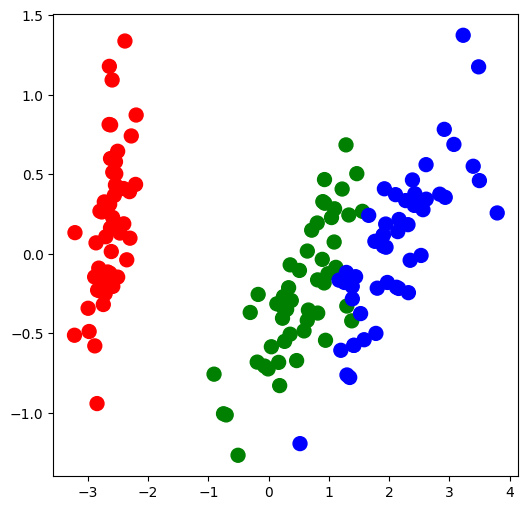

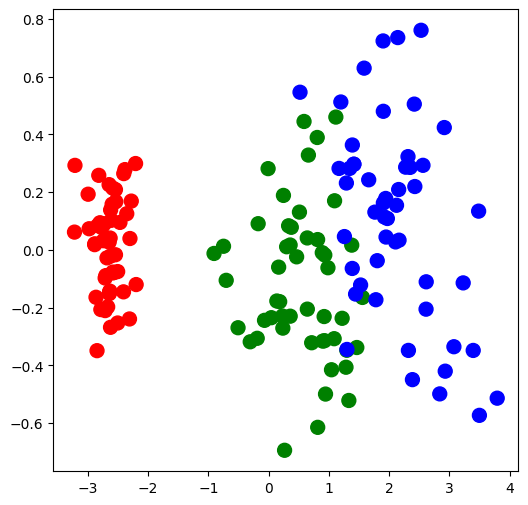

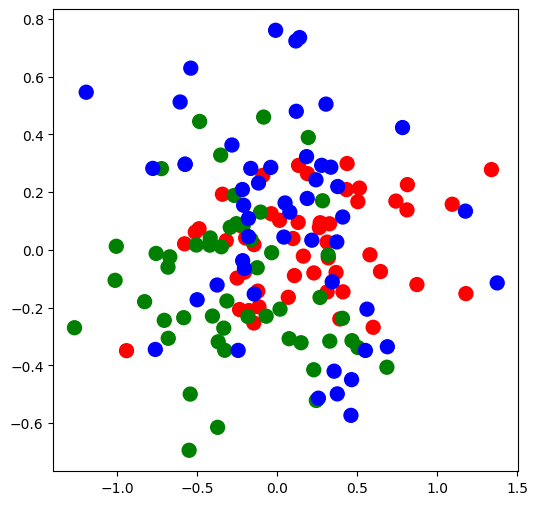

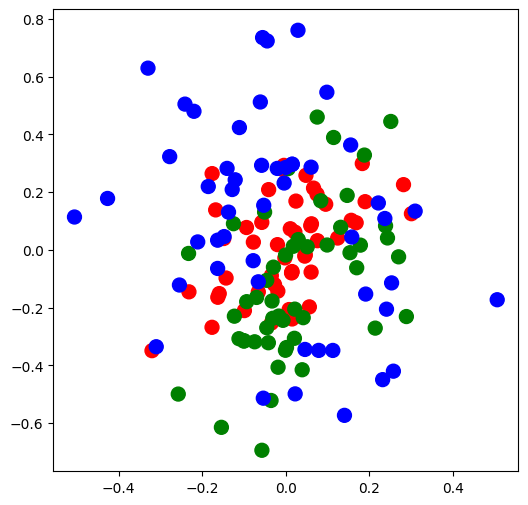

In [3]:
pca = PCA()
pdata = pca.fit_transform(iris['data'])
@interact(i= (0,3), j= (0,3))
def g(i=0, j=1):
    fig = plt.figure(figsize=(6,6))
    plt.scatter(pdata[:, i], pdata[:, j], c=lc,s=100);

Looking at the variance explained by each component, we can see that the first one has most of the variance and the two first components explains almost 98%, so only this components would be necessary.

In [4]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


## Dimensionality Reduction - non Linear: Kernel PCA

interactive(children=(Dropdown(description='kernel', options=('rbf', 'poly'), value='rbf'), Dropdown(descripti…

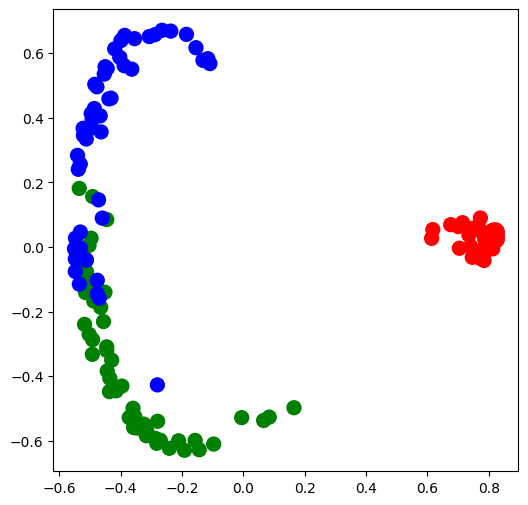

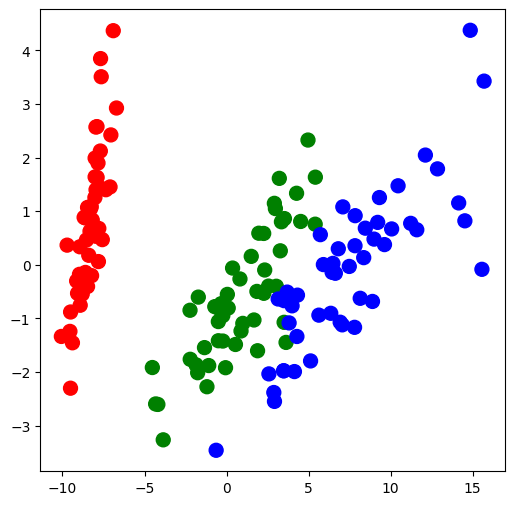

In [5]:
@interact(kernel= ['rbf', 'poly'], degree = [2,3, 4, 5])
def g(kernel='rbf', degree=2):
    kpca = KernelPCA(n_components=2, kernel=kernel, degree=degree)
    kpdata = kpca.fit_transform(iris['data'])
    fig = plt.figure(figsize=(6,6))
    plt.scatter(kpdata[:, 0], kpdata[:, 1], c=lc,s=100);

## Dimensionality Reduction - non Linear: ISOMAP

interactive(children=(IntSlider(value=3, description='nn', max=15, min=1, step=2), Output()), _dom_classes=('w…

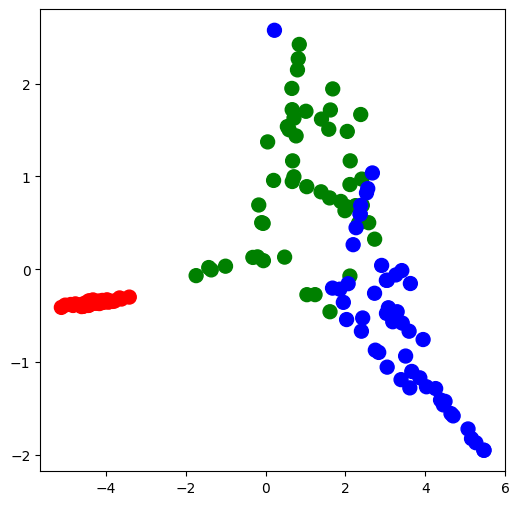

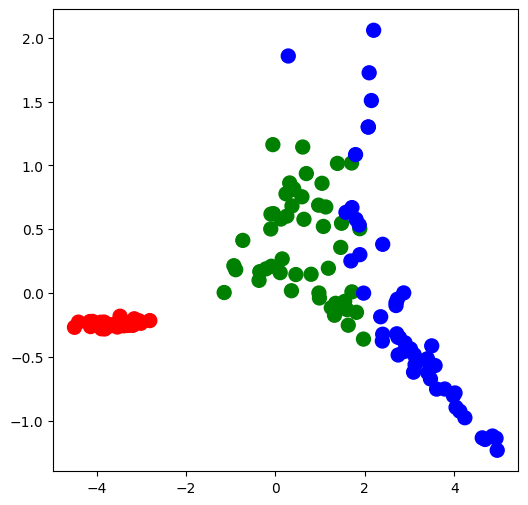

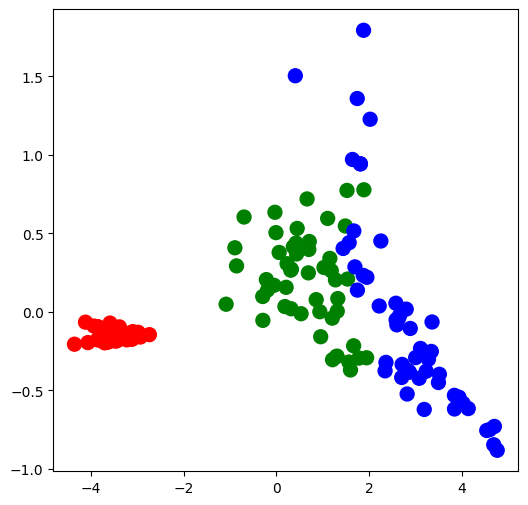

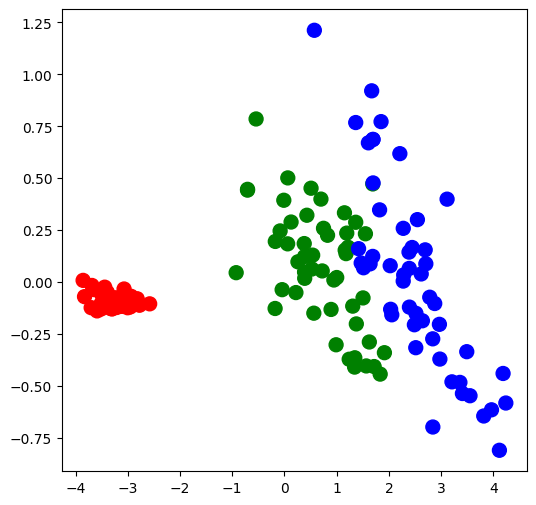

In [6]:
@interact(nn= (1, 15, 2))
def g(nn=3):
    iso = Isomap(n_components=2, n_neighbors=nn)
    isdata = iso.fit_transform(iris['data'])
    fig = plt.figure(figsize=(6,6))
    plt.scatter(isdata[:, 0], isdata[:, 1], c=lc,s=100);

interactive(children=(IntSlider(value=3, description='nn', max=15, min=1, step=2), Output()), _dom_classes=('w…

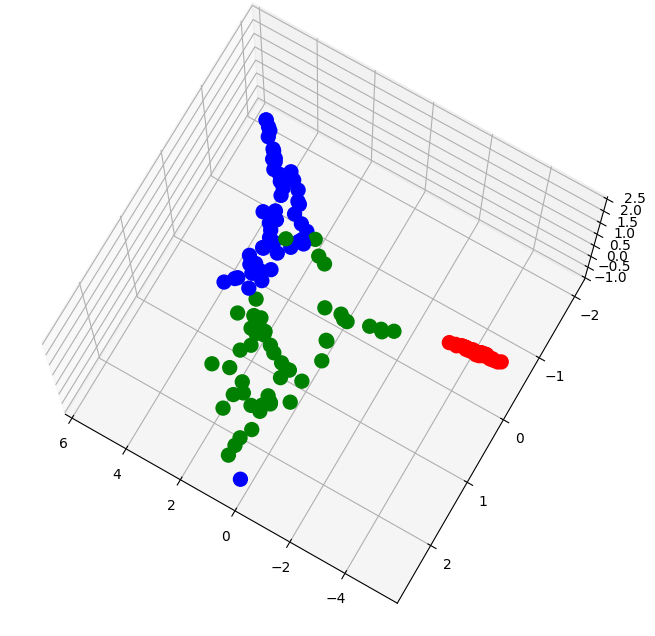

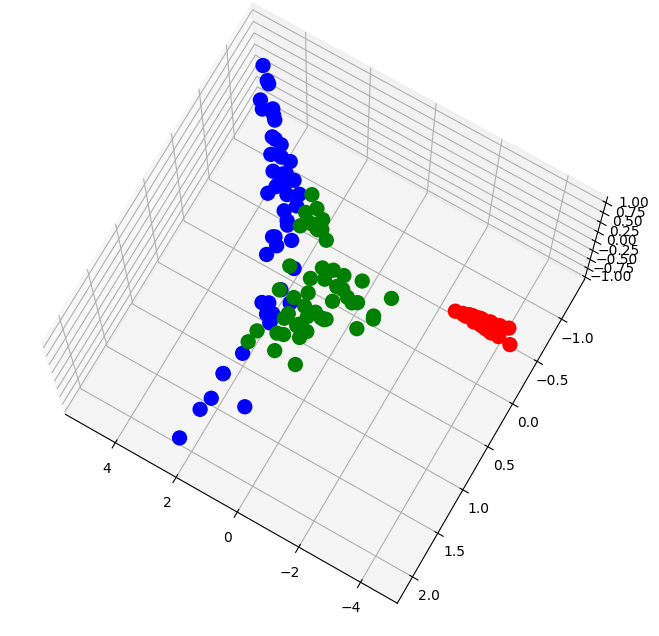

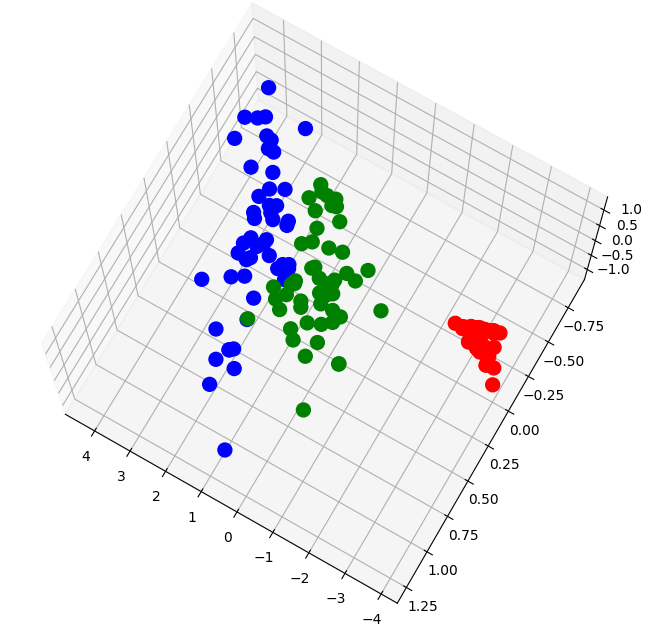

In [7]:
@interact(nn= (1, 15, 2))
def g(nn=3):
    iso = Isomap(n_components=3, n_neighbors=nn)
    is3data = iso.fit_transform(iris['data'])
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(75, 120)
    plt.scatter(is3data[:, 0], is3data[:, 1], zs=is3data[:, 2], depthshade=False, c=lc,s=100);

## Dimensionality Reduction - non Linear: LLE

interactive(children=(IntSlider(value=5, description='nn', max=50, min=5, step=5), Output()), _dom_classes=('w…

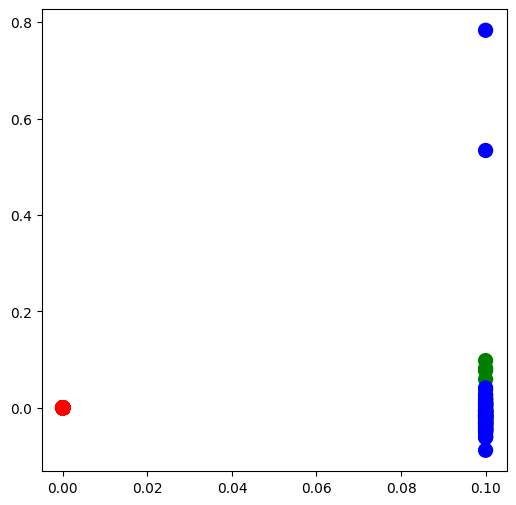

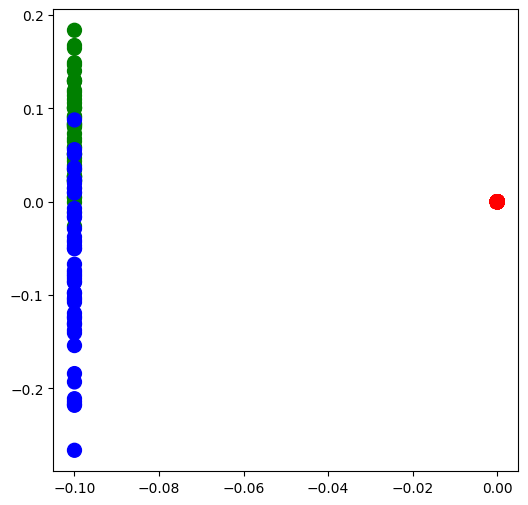

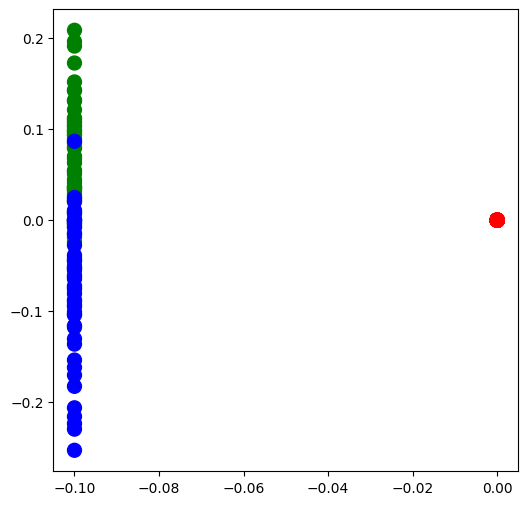

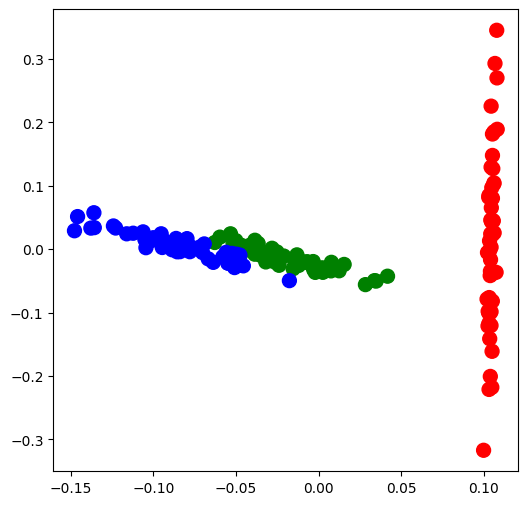

In [8]:
@interact(nn= (5, 50, 5))
def g(nn=5):
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=2, method='standard')
    lldata = lle.fit_transform(iris['data'])
    print (lle.reconstruction_error_)
    fig = plt.figure(figsize=(6,6))
    plt.scatter(lldata[:, 0], lldata[:, 1], c=lc,s=100);

interactive(children=(IntSlider(value=5, description='nn', max=25, min=5, step=5), Output()), _dom_classes=('w…

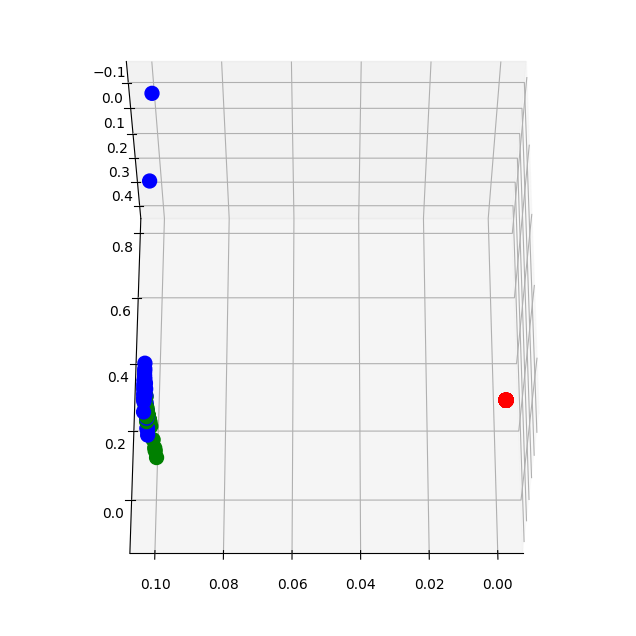

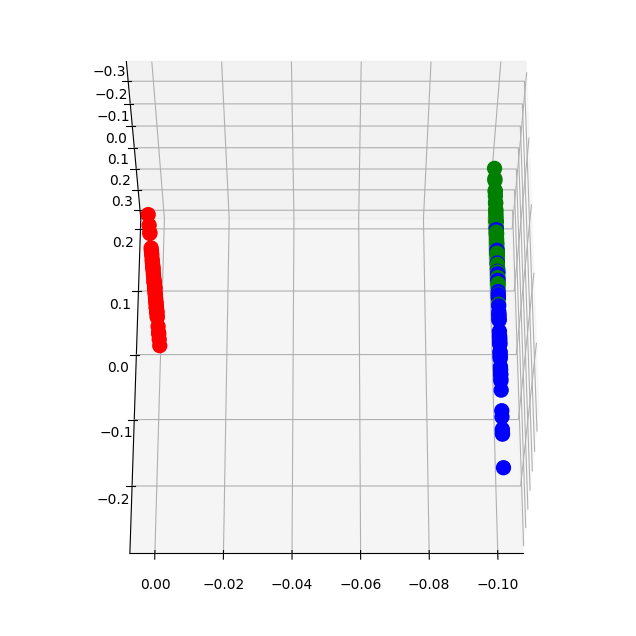

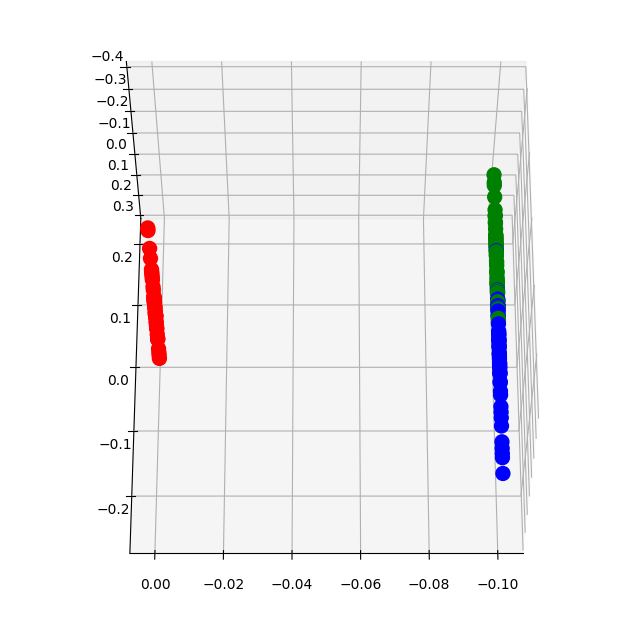

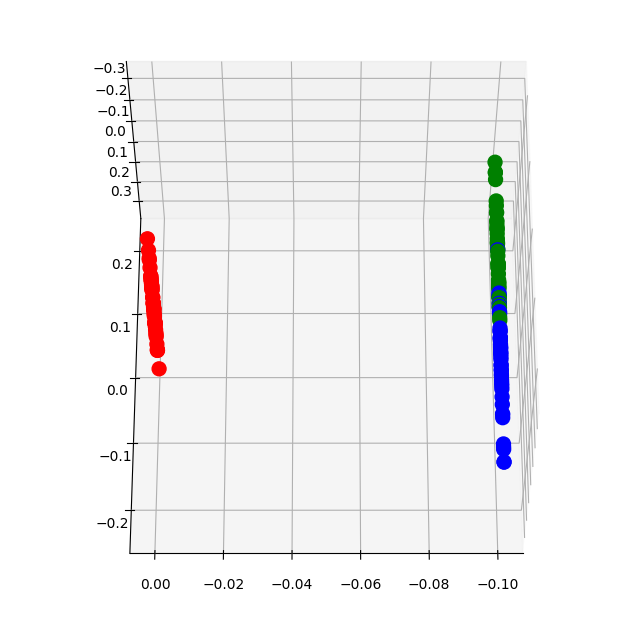

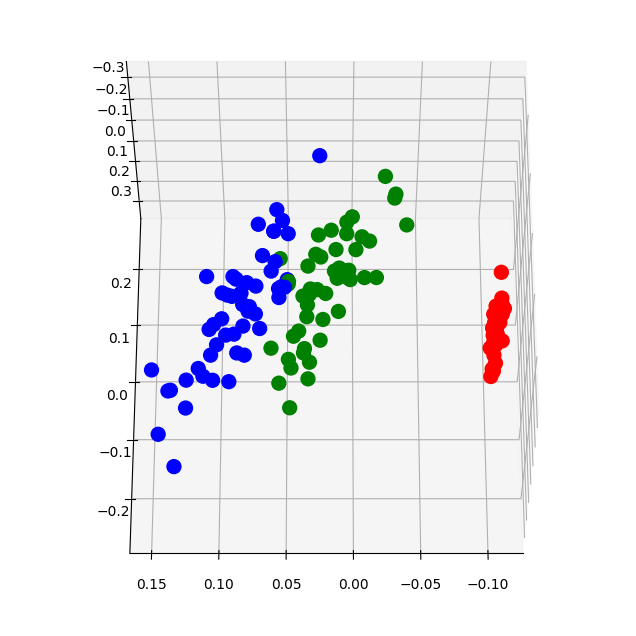

In [9]:
@interact(nn= (5, 25, 5))
def g(nn=5):
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=3, method='standard')
    ll3data = lle.fit_transform(iris['data'])
    print (lle.reconstruction_error_)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(240, 90)
    plt.scatter(ll3data[:, 0], ll3data[:, 1], zs=ll3data[:, 2], depthshade=False, c=lc,s=100);

## Dimensionality Reduction - non Linear: t-SNE

interactive(children=(IntSlider(value=5, description='nn', max=50, min=5, step=5), IntSlider(value=5, descript…

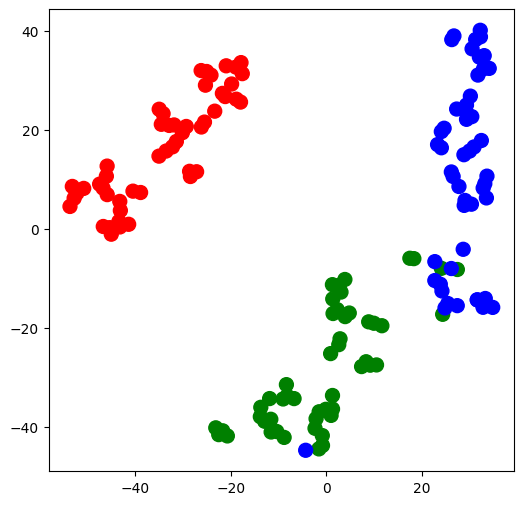

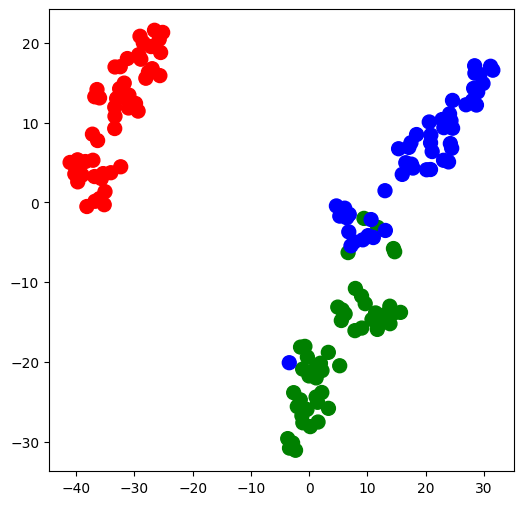

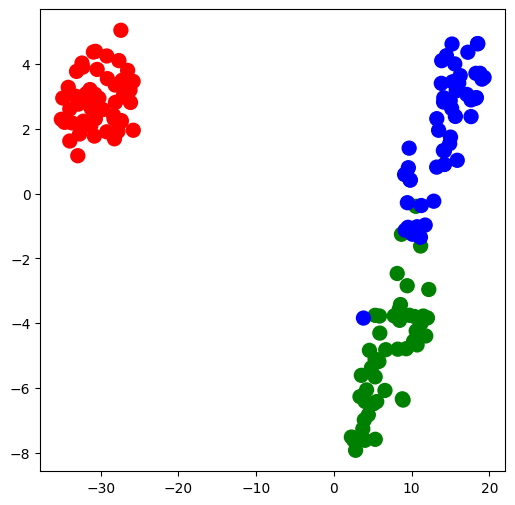

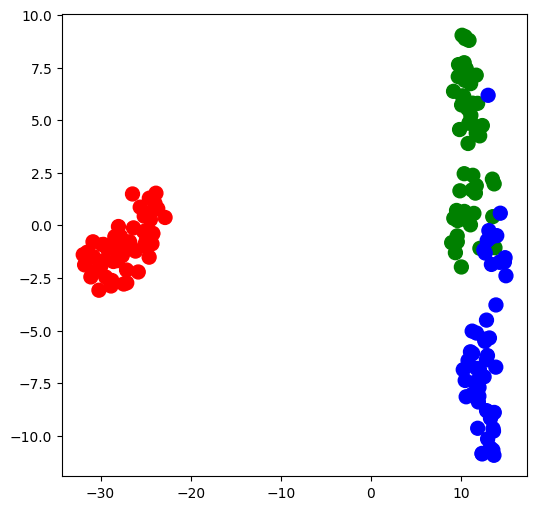

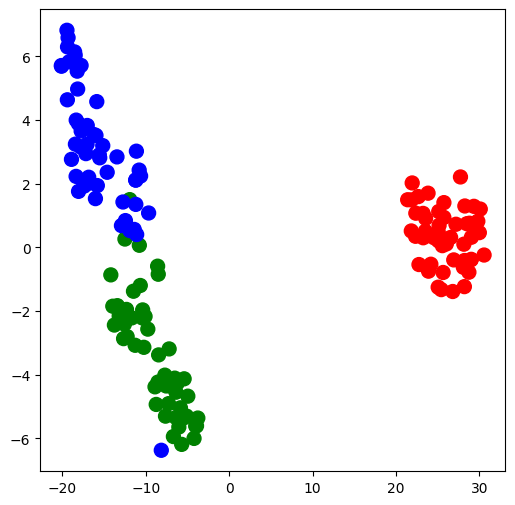

In [10]:
@interact(nn= (5, 50, 5), exag=(5,40,5))
def g(nn=5,exag=5):
    tsne = TSNE(perplexity=nn, n_components=2, early_exaggeration=exag)
    lldata = tsne.fit_transform(iris['data'])
    print (tsne.kl_divergence_)
    fig = plt.figure(figsize=(6,6))
    plt.scatter(lldata[:, 0], lldata[:, 1], c=lc,s=100);

interactive(children=(IntSlider(value=5, description='nn', max=50, min=5, step=5), IntSlider(value=5, descript…

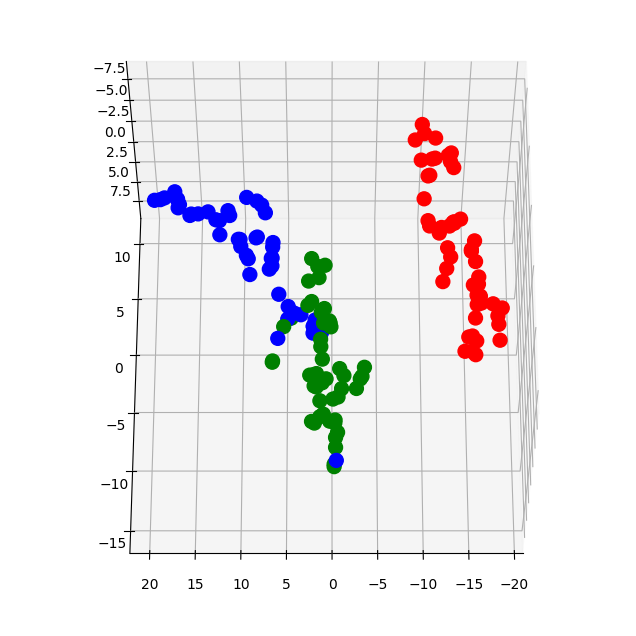

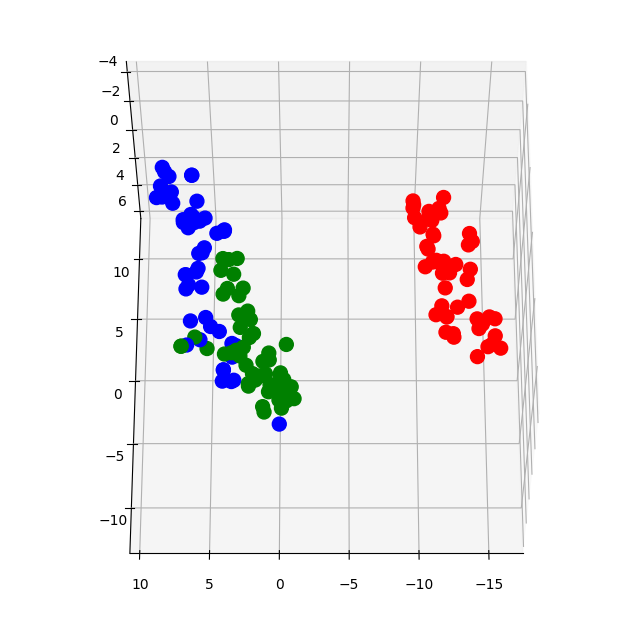

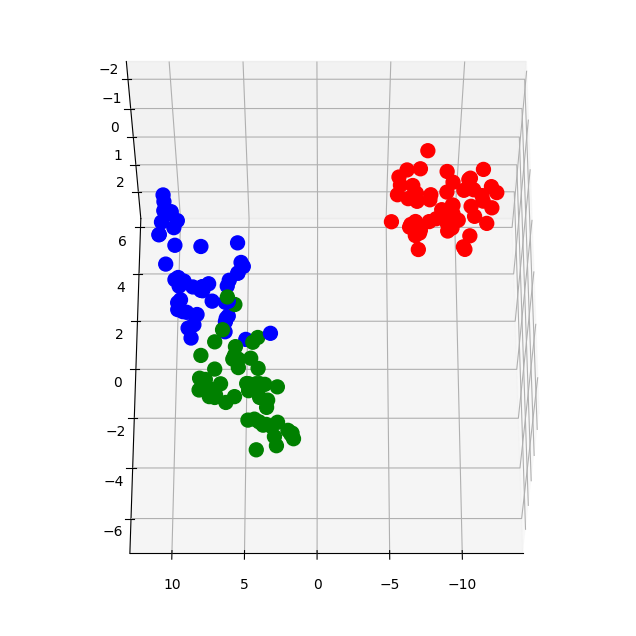

In [11]:
@interact(nn= (5, 50, 5), exag=(5,40,5))
def g(nn=5,exag=5):
    tsne = TSNE(perplexity=nn, n_components=3, early_exaggeration=exag)
    ll3data = tsne.fit_transform(iris['data'])
    print (tsne.kl_divergence_)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(240, 90)
    plt.scatter(ll3data[:, 0], ll3data[:, 1], zs=ll3data[:, 2], depthshade=False, c=lc,s=100);

## Feature Selection: Laplacian Score

interactive(children=(IntSlider(value=5, description='nn', max=25, min=5, step=5), Output()), _dom_classes=('w…

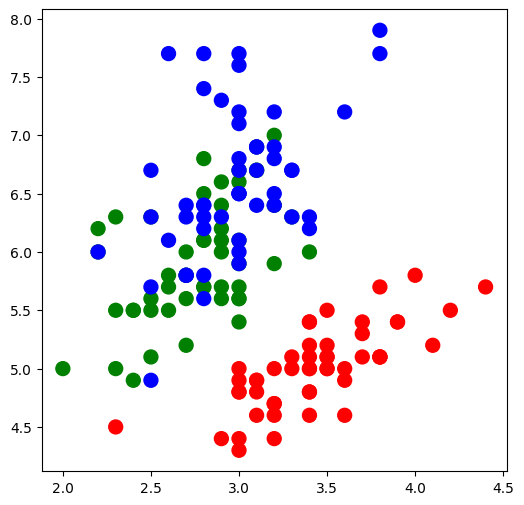

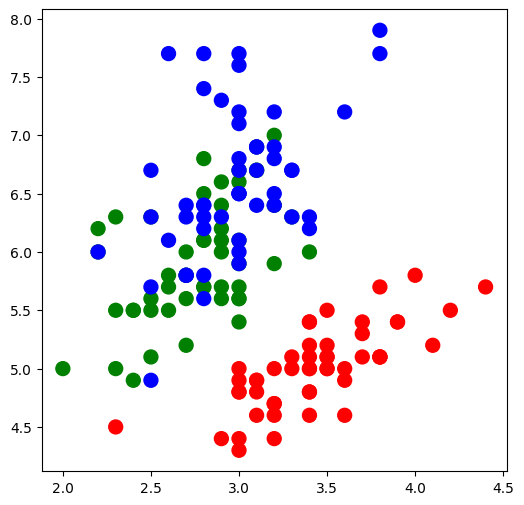

In [12]:
@interact(nn= (5, 25, 5))
def g(nn=5):
    lap = LaplacianScore(n_neighbors=nn, bandwidth=0.1, k=2)
    irissel = lap.fit_transform(iris['data'])
    print (lap.scores_)
    fig = plt.figure(figsize=(6,6))
    plt.scatter(irissel[:, 0], irissel[:, 1], c=lc,s=100);